In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('test_p.csv')
df

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value
0,1,1001,101,Laptop,Electronics,1200,1,2020-01-15,USA,Credit Card,False,1200
1,2,1002,102,Keyboard,Electronics,50,1,2020-01-17,Canada,Debit Card,False,50
2,3,1003,103,Mouse,Electronics,20,1,2020-01-18,USA,PayPal,False,20
3,4,1004,104,Headphones,Electronics,100,2,2020-01-19,UK,Credit Card,False,200
4,5,1005,105,Charger,Electronics,30,1,2020-01-20,Germany,Credit Card,False,30
...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,1059,119,Gaming Headset,Electronics,150,1,2020-06-24,UK,Credit Card,True,150
59,10,1060,120,VR Headset,Electronics,400,1,2020-06-25,Germany,Credit Card,True,400
60,1,1061,121,Coffee Maker,Home Appliances,150,1,2020-07-15,USA,Credit Card,True,150
61,2,1062,122,Toaster,Home Appliances,50,1,2020-07-17,Canada,Debit Card,True,50


In [4]:
# - Рассчитай среднюю стоимость заказа по месяцам за последние 3 года
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                63 non-null     int64 
 1   order_id               63 non-null     int64 
 2   product_id             63 non-null     int64 
 3   product_name           63 non-null     object
 4   category               63 non-null     object
 5   price                  63 non-null     int64 
 6   quantity               63 non-null     int64 
 7   date                   63 non-null     object
 8   country                63 non-null     object
 9   payment_method         63 non-null     object
 10  is_returning_customer  63 non-null     bool  
 11  purchase_value         63 non-null     int64 
dtypes: bool(1), int64(6), object(5)
memory usage: 5.6+ KB


In [5]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                63 non-null     int64         
 1   order_id               63 non-null     int64         
 2   product_id             63 non-null     int64         
 3   product_name           63 non-null     object        
 4   category               63 non-null     object        
 5   price                  63 non-null     int64         
 6   quantity               63 non-null     int64         
 7   date                   63 non-null     datetime64[ns]
 8   country                63 non-null     object        
 9   payment_method         63 non-null     object        
 10  is_returning_customer  63 non-null     bool          
 11  purchase_value         63 non-null     int64         
dtypes: bool(1), datetime64[ns](1), int64(6), object(4)
memory usage: 5

In [6]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value,month,year
0,1,1001,101,Laptop,Electronics,1200,1,2020-01-15,USA,Credit Card,False,1200,1,2020
1,2,1002,102,Keyboard,Electronics,50,1,2020-01-17,Canada,Debit Card,False,50,1,2020
2,3,1003,103,Mouse,Electronics,20,1,2020-01-18,USA,PayPal,False,20,1,2020
3,4,1004,104,Headphones,Electronics,100,2,2020-01-19,UK,Credit Card,False,200,1,2020
4,5,1005,105,Charger,Electronics,30,1,2020-01-20,Germany,Credit Card,False,30,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,1059,119,Gaming Headset,Electronics,150,1,2020-06-24,UK,Credit Card,True,150,6,2020
59,10,1060,120,VR Headset,Electronics,400,1,2020-06-25,Germany,Credit Card,True,400,6,2020
60,1,1061,121,Coffee Maker,Home Appliances,150,1,2020-07-15,USA,Credit Card,True,150,7,2020
61,2,1062,122,Toaster,Home Appliances,50,1,2020-07-17,Canada,Debit Card,True,50,7,2020


In [7]:
# Тут создаю новый df, с помощью которого буду фильтровать начальный df
last_3_years = df['date'].max() - pd.DateOffset(years=3)
last_3_years

Timestamp('2017-07-18 00:00:00')

In [8]:
df_last_3_years = df[df['date'] >= last_3_years]
df_last_3_years

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value,month,year
0,1,1001,101,Laptop,Electronics,1200,1,2020-01-15,USA,Credit Card,False,1200,1,2020
1,2,1002,102,Keyboard,Electronics,50,1,2020-01-17,Canada,Debit Card,False,50,1,2020
2,3,1003,103,Mouse,Electronics,20,1,2020-01-18,USA,PayPal,False,20,1,2020
3,4,1004,104,Headphones,Electronics,100,2,2020-01-19,UK,Credit Card,False,200,1,2020
4,5,1005,105,Charger,Electronics,30,1,2020-01-20,Germany,Credit Card,False,30,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,1059,119,Gaming Headset,Electronics,150,1,2020-06-24,UK,Credit Card,True,150,6,2020
59,10,1060,120,VR Headset,Electronics,400,1,2020-06-25,Germany,Credit Card,True,400,6,2020
60,1,1061,121,Coffee Maker,Home Appliances,150,1,2020-07-15,USA,Credit Card,True,150,7,2020
61,2,1062,122,Toaster,Home Appliances,50,1,2020-07-17,Canada,Debit Card,True,50,7,2020


In [9]:
df_last_3_years.groupby(['year', 'month']).agg({'purchase_value': 'mean'})

purchase_value
year month                
2020 1               315.0
     2               315.0
     3               315.0
     4               365.0
     5               365.0
     6               365.0
     7               100.0

In [10]:
# Проанализируй, как менялось количество заказов от повторных покупателей по кварталам за последние 3 года
df_last_3_years['quarter'] = df_last_3_years['date'].dt.quarter
df_last_3_years

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value,month,year,quarter
0,1,1001,101,Laptop,Electronics,1200,1,2020-01-15,USA,Credit Card,False,1200,1,2020,1
1,2,1002,102,Keyboard,Electronics,50,1,2020-01-17,Canada,Debit Card,False,50,1,2020,1
2,3,1003,103,Mouse,Electronics,20,1,2020-01-18,USA,PayPal,False,20,1,2020,1
3,4,1004,104,Headphones,Electronics,100,2,2020-01-19,UK,Credit Card,False,200,1,2020,1
4,5,1005,105,Charger,Electronics,30,1,2020-01-20,Germany,Credit Card,False,30,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,1059,119,Gaming Headset,Electronics,150,1,2020-06-24,UK,Credit Card,True,150,6,2020,2
59,10,1060,120,VR Headset,Electronics,400,1,2020-06-25,Germany,Credit Card,True,400,6,2020,2
60,1,1061,121,Coffee Maker,Home Appliances,150,1,2020-07-15,USA,Credit Card,True,150,7,2020,3
61,2,1062,122,Toaster,Home Appliances,50,1,2020-07-17,Canada,Debit Card,True,50,7,2020,3


In [11]:
df_last_3_years[df_last_3_years['is_returning_customer'] == True].groupby(['year', 'quarter']).agg({'order_id': 'count'})
# Количество заказов от повторных покупателей увеличилось с 1 по 2 квартал и уменьшилось со 2 по 3 квартал  

order_id
year quarter          
2020 1              20
     2              30
     3               3

In [12]:
# Сравнительный анализ популярности категорий товаров в разных странах
df

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value,month,year
0,1,1001,101,Laptop,Electronics,1200,1,2020-01-15,USA,Credit Card,False,1200,1,2020
1,2,1002,102,Keyboard,Electronics,50,1,2020-01-17,Canada,Debit Card,False,50,1,2020
2,3,1003,103,Mouse,Electronics,20,1,2020-01-18,USA,PayPal,False,20,1,2020
3,4,1004,104,Headphones,Electronics,100,2,2020-01-19,UK,Credit Card,False,200,1,2020
4,5,1005,105,Charger,Electronics,30,1,2020-01-20,Germany,Credit Card,False,30,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,1059,119,Gaming Headset,Electronics,150,1,2020-06-24,UK,Credit Card,True,150,6,2020
59,10,1060,120,VR Headset,Electronics,400,1,2020-06-25,Germany,Credit Card,True,400,6,2020
60,1,1061,121,Coffee Maker,Home Appliances,150,1,2020-07-15,USA,Credit Card,True,150,7,2020
61,2,1062,122,Toaster,Home Appliances,50,1,2020-07-17,Canada,Debit Card,True,50,7,2020


In [13]:
df.groupby(['country', 'category']).agg({'order_id': 'count'}).sort_values(['order_id'], ascending=False)

,,order_id
country,category,
USA,Electronics,24
Canada,Electronics,12
UK,Electronics,12
Germany,Electronics,12
USA,Home Appliances,2
Canada,Home Appliances,1


In [23]:
# Делим юзеров на 3 категории по сумме их покупок
users_purchases_df = df.groupby('user_id').agg({'purchase_value': 'sum'}).rename(columns={'purchase_value': 'total_purchase'})
users_purchases_df

,total_purchase
user_id,
1,6750
2,1700
3,760
4,2100
5,390
6,3300
7,1800
8,1350
9,1200


In [26]:
def categorize(amount):
    if amount <= 1500:
        return 'low amount'
    elif 1500 < amount < 3000:
        return 'middle amount'
    else:
        return 'high amount'
    
users_purchases_df['amount_category'] = users_purchases_df['total_purchase'].apply(categorize)
users_purchases_df

,total_purchase,amount_category
user_id,,
1,6750,high amount
2,1700,middle amount
3,760,low amount
4,2100,middle amount
5,390,low amount
6,3300,high amount
7,1800,middle amount
8,1350,low amount
9,1200,low amount


In [27]:
df = df.merge(users_purchases_df['amount_category'], on='user_id', how='left')
df

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value,month,year,amount_category
0,1,1001,101,Laptop,Electronics,1200,1,2020-01-15,USA,Credit Card,False,1200,1,2020,high amount
1,2,1002,102,Keyboard,Electronics,50,1,2020-01-17,Canada,Debit Card,False,50,1,2020,middle amount
2,3,1003,103,Mouse,Electronics,20,1,2020-01-18,USA,PayPal,False,20,1,2020,low amount
3,4,1004,104,Headphones,Electronics,100,2,2020-01-19,UK,Credit Card,False,200,1,2020,middle amount
4,5,1005,105,Charger,Electronics,30,1,2020-01-20,Germany,Credit Card,False,30,1,2020,low amount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,1059,119,Gaming Headset,Electronics,150,1,2020-06-24,UK,Credit Card,True,150,6,2020,low amount
59,10,1060,120,VR Headset,Electronics,400,1,2020-06-25,Germany,Credit Card,True,400,6,2020,low amount
60,1,1061,121,Coffee Maker,Home Appliances,150,1,2020-07-15,USA,Credit Card,True,150,7,2020,high amount
61,2,1062,122,Toaster,Home Appliances,50,1,2020-07-17,Canada,Debit Card,True,50,7,2020,middle amount


In [29]:
# Какая средняя стоимость заказа у пользователей каждого сегмента?
df.groupby(['amount_category']).agg({'purchase_value': 'mean'})

,purchase_value
amount_category,
high amount,773.076923
low amount,162.903226
middle amount,294.736842


In [39]:
# Какой процент повторных покупателей в каждом сегменте?
returning_customers_df = df[df['is_returning_customer'] == True]

# Количество повторных покупателей в кажом сегменте
number_returning_customers_df = returning_customers_df.groupby('amount_category')['user_id'].nunique()
number_returning_customers_df

amount_category
high amount      2
low amount       5
middle amount    3
Name: user_id, dtype: int64

In [40]:
# Общее количество покупателей в данном сегменте
total_users_df = df.groupby('amount_category')['user_id'].nunique()
total_users_df

amount_category
high amount      2
low amount       5
middle amount    3
Name: user_id, dtype: int64

In [47]:
# Находим процент повторных покупателей в каждом сегменте
percent_returning_customers_df = (number_returning_customers_df / total_users_df) * 100
percent_returning_customers_df.rename('percent_returning_customers', inplace=True)
percent_returning_customers_df

amount_category
high amount      100.0
low amount       100.0
middle amount    100.0
Name: percent_returning_customers, dtype: float64

In [48]:
# Какие категории товаров наиболее популярны у пользователей каждого сегмента?
df

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value,month,year,amount_category
0,1,1001,101,Laptop,Electronics,1200,1,2020-01-15,USA,Credit Card,False,1200,1,2020,high amount
1,2,1002,102,Keyboard,Electronics,50,1,2020-01-17,Canada,Debit Card,False,50,1,2020,middle amount
2,3,1003,103,Mouse,Electronics,20,1,2020-01-18,USA,PayPal,False,20,1,2020,low amount
3,4,1004,104,Headphones,Electronics,100,2,2020-01-19,UK,Credit Card,False,200,1,2020,middle amount
4,5,1005,105,Charger,Electronics,30,1,2020-01-20,Germany,Credit Card,False,30,1,2020,low amount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,1059,119,Gaming Headset,Electronics,150,1,2020-06-24,UK,Credit Card,True,150,6,2020,low amount
59,10,1060,120,VR Headset,Electronics,400,1,2020-06-25,Germany,Credit Card,True,400,6,2020,low amount
60,1,1061,121,Coffee Maker,Home Appliances,150,1,2020-07-15,USA,Credit Card,True,150,7,2020,high amount
61,2,1062,122,Toaster,Home Appliances,50,1,2020-07-17,Canada,Debit Card,True,50,7,2020,middle amount


In [50]:
df.groupby(['amount_category', 'category']).agg({'category': 'count'})
# У пользователей каждого сегмента наиболее популярны товары категории Electronics

category
amount_category category                 
high amount     Electronics            12
                Home Appliances         1
low amount      Electronics            30
                Home Appliances         1
middle amount   Electronics            18
                Home Appliances         1

In [51]:
# Построй график с количеством заказов от повторных покупателей по кварталам
df

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value,month,year,amount_category
0,1,1001,101,Laptop,Electronics,1200,1,2020-01-15,USA,Credit Card,False,1200,1,2020,high amount
1,2,1002,102,Keyboard,Electronics,50,1,2020-01-17,Canada,Debit Card,False,50,1,2020,middle amount
2,3,1003,103,Mouse,Electronics,20,1,2020-01-18,USA,PayPal,False,20,1,2020,low amount
3,4,1004,104,Headphones,Electronics,100,2,2020-01-19,UK,Credit Card,False,200,1,2020,middle amount
4,5,1005,105,Charger,Electronics,30,1,2020-01-20,Germany,Credit Card,False,30,1,2020,low amount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,1059,119,Gaming Headset,Electronics,150,1,2020-06-24,UK,Credit Card,True,150,6,2020,low amount
59,10,1060,120,VR Headset,Electronics,400,1,2020-06-25,Germany,Credit Card,True,400,6,2020,low amount
60,1,1061,121,Coffee Maker,Home Appliances,150,1,2020-07-15,USA,Credit Card,True,150,7,2020,high amount
61,2,1062,122,Toaster,Home Appliances,50,1,2020-07-17,Canada,Debit Card,True,50,7,2020,middle amount


In [56]:
df['quarter'] = df['date'].dt.quarter
df

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value,month,year,amount_category,quarter
0,1,1001,101,Laptop,Electronics,1200,1,2020-01-15,USA,Credit Card,False,1200,1,2020,high amount,1
1,2,1002,102,Keyboard,Electronics,50,1,2020-01-17,Canada,Debit Card,False,50,1,2020,middle amount,1
2,3,1003,103,Mouse,Electronics,20,1,2020-01-18,USA,PayPal,False,20,1,2020,low amount,1
3,4,1004,104,Headphones,Electronics,100,2,2020-01-19,UK,Credit Card,False,200,1,2020,middle amount,1
4,5,1005,105,Charger,Electronics,30,1,2020-01-20,Germany,Credit Card,False,30,1,2020,low amount,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,1059,119,Gaming Headset,Electronics,150,1,2020-06-24,UK,Credit Card,True,150,6,2020,low amount,2
59,10,1060,120,VR Headset,Electronics,400,1,2020-06-25,Germany,Credit Card,True,400,6,2020,low amount,2
60,1,1061,121,Coffee Maker,Home Appliances,150,1,2020-07-15,USA,Credit Card,True,150,7,2020,high amount,3
61,2,1062,122,Toaster,Home Appliances,50,1,2020-07-17,Canada,Debit Card,True,50,7,2020,middle amount,3


In [70]:
# Количество заказов от повторных покупателей по кварталам
orders_by_quarter_df = df[df['is_returning_customer'] == True].groupby(['quarter']).agg({'order_id': 'count'}).rename(columns={'order_id': 'count_orders'})
orders_by_quarter_df

,count_orders
quarter,
1,20
2,30
3,3


In [71]:
orders_by_quarter_df.reset_index(inplace=True)
orders_by_quarter_df

,quarter,count_orders
0,1,20
1,2,30
2,3,3


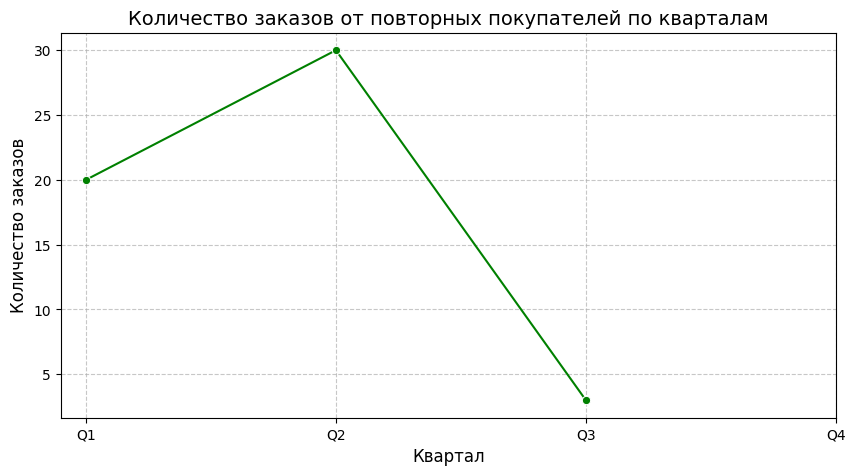

In [89]:
# График с количеством заказов от повторных покупателей по кварталам
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=orders_by_quarter_df, x='quarter', y='count_orders', marker='o', color='green')
ax.set_xticks([1, 2, 3, 4]) 
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4']) 
plt.title('Количество заказов от повторных покупателей по кварталам', fontsize=14)
plt.xlabel('Квартал', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

In [90]:
# Создай диаграмму с популярностью категорий товаров в разных странах
df

,user_id,order_id,product_id,product_name,category,price,quantity,date,country,payment_method,is_returning_customer,purchase_value,month,year,amount_category,quarter
0,1,1001,101,Laptop,Electronics,1200,1,2020-01-15,USA,Credit Card,False,1200,1,2020,high amount,1
1,2,1002,102,Keyboard,Electronics,50,1,2020-01-17,Canada,Debit Card,False,50,1,2020,middle amount,1
2,3,1003,103,Mouse,Electronics,20,1,2020-01-18,USA,PayPal,False,20,1,2020,low amount,1
3,4,1004,104,Headphones,Electronics,100,2,2020-01-19,UK,Credit Card,False,200,1,2020,middle amount,1
4,5,1005,105,Charger,Electronics,30,1,2020-01-20,Germany,Credit Card,False,30,1,2020,low amount,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,1059,119,Gaming Headset,Electronics,150,1,2020-06-24,UK,Credit Card,True,150,6,2020,low amount,2
59,10,1060,120,VR Headset,Electronics,400,1,2020-06-25,Germany,Credit Card,True,400,6,2020,low amount,2
60,1,1061,121,Coffee Maker,Home Appliances,150,1,2020-07-15,USA,Credit Card,True,150,7,2020,high amount,3
61,2,1062,122,Toaster,Home Appliances,50,1,2020-07-17,Canada,Debit Card,True,50,7,2020,middle amount,3


In [93]:
popular_category_df = df.groupby(['country', 'category']).agg({'order_id': 'count'}).rename(columns={'order_id': 'count_orders'})
popular_category_df

count_orders
country category                     
Canada  Electronics                12
        Home Appliances             1
Germany Electronics                12
UK      Electronics                12
USA     Electronics                24
        Home Appliances             2

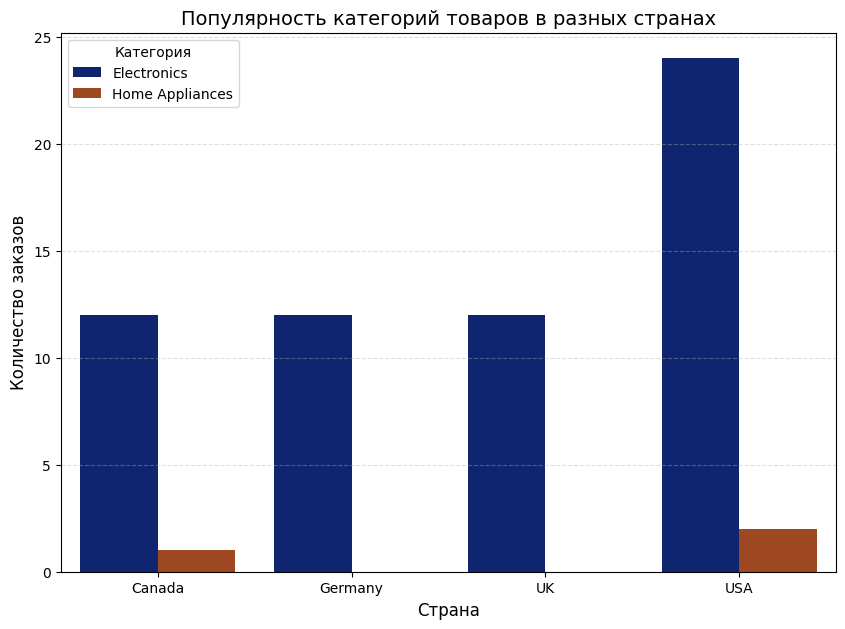

In [109]:
# Диаграмма с популярностью категорий товаров в разных странах
plt.figure(figsize=(10, 7))
sns.barplot(data=popular_category_df, x='country', y='count_orders', hue='category', palette='dark')
plt.title('Популярность категорий товаров в разных странах', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.legend(title='Категория')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()